In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# load data

In [3]:
import sys
sys.path.insert(0, "../research/fashion-mnist/")

In [4]:
from utils import mnist_reader
X_train, y_train = mnist_reader.load_mnist('../research/fashion-mnist/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('../research/fashion-mnist/data/fashion', kind='t10k')

X_train.shape

(60000, 784)

# tsne

In [5]:
from openTSNE import TSNE, TSNEEmbedding, affinity, initialization
from openTSNE import initialization
from openTSNE.callbacks import ErrorLogger

## init: pca

In [6]:
opt_res_rnd = []

tsne = TSNE(
    initialization="pca",
    n_jobs=8,
    # The embedding will be appended to the list we defined above, make sure we copy the
    # embedding, otherwise the same object reference will be stored for every iteration
    callbacks=lambda it, err, emb: opt_res_rnd.append((it, err)),
    # This should be done on every iteration
    callbacks_every_iters=1,
)

In [7]:
%time emb_rnd = tsne.fit(X_train)

/home/antoine/anaconda3/envs/raviz_opentsne/lib/python3.7/site-packages/numba-0.44.0-py3.7-linux-x86_64.egg/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../anaconda3/envs/raviz_opentsne/lib/python3.7/site-packages/pynndescent-0.3.0-py3.7.egg/pynndescent/rp_trees.py", line 132:
<source missing, REPL/exec in use?>

  self.func_ir.loc))
/home/antoine/anaconda3/envs/raviz_opentsne/lib/python3.7/site-packages/numba-0.44.0-py3.7-linux-x86_64.egg/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics f

CPU times: user 19min 48s, sys: 37.8 s, total: 20min 25s
Wall time: 3min 17s


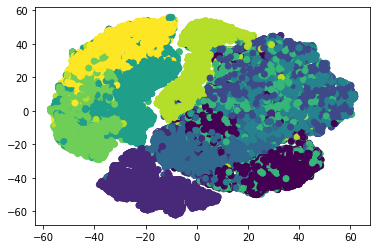

In [8]:
plt.scatter(emb_rnd[:,0], emb_rnd[:,1], c=y_train, rasterized=True)

# classification

In [9]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.33, random_state=42)

In [10]:
emb_rnd.shape

(60000, 2)

In [11]:
import sklearn

In [12]:
split = sklearn.model_selection.ShuffleSplit(n_splits=1, random_state=0, test_size=0.25)

In [13]:
id_train, id_test = next(split.split(emb_rnd))

In [14]:
Xemb_train = emb_rnd[id_train]
Xemb_test  = emb_rnd[id_test]

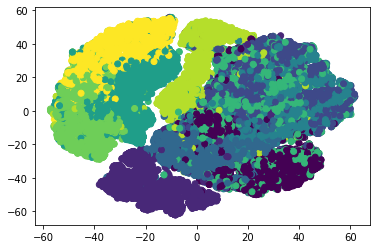

In [15]:
plt.scatter(Xemb_train[:,0], Xemb_train[:,1], c=y_train[id_train], rasterized=True)

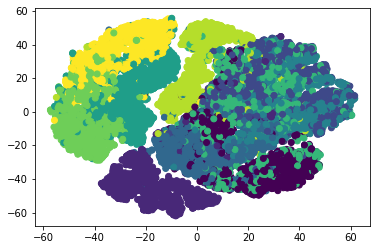

In [16]:
plt.scatter(Xemb_test[:,0], Xemb_test[:,1], c=y_train[id_test], rasterized=True)

# 1-NN classification

### with sklearn

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
neigh = KNeighborsClassifier(n_neighbors=1)

In [19]:
%time neigh.fit(Xemb_train, y_train[id_train]) 

CPU times: user 25.9 ms, sys: 60 µs, total: 26 ms
Wall time: 25.6 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [20]:
%time y_pred = neigh.predict(Xemb_test)

CPU times: user 442 ms, sys: 53 µs, total: 442 ms
Wall time: 440 ms


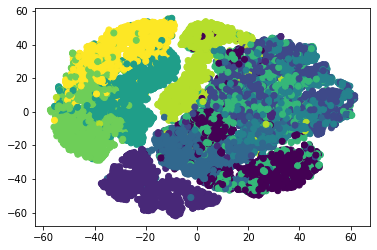

In [21]:
plt.scatter(Xemb_test[:,0], Xemb_test[:,1], c=y_pred, rasterized=True)

In [22]:
y_true = y_train[id_test]

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_true, y_pred)

0.8087333333333333

### with pynndescent

In [25]:
from pynndescent import NNDescent

In [26]:
index = NNDescent(Xemb_train)

/home/antoine/anaconda3/envs/raviz_opentsne/lib/python3.7/site-packages/pynndescent-0.3.0-py3.7.egg/pynndescent/pynndescent_.py:199: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../anaconda3/envs/raviz_opentsne/lib/python3.7/site-packages/pynndescent-0.3.0-py3.7.egg/pynndescent/utils.py", line 458:
<source missing, REPL/exec in use?>



In [27]:
X_pred = index.query(Xemb_test, k=1, queue_size=1.0)

/home/antoine/anaconda3/envs/raviz_opentsne/lib/python3.7/site-packages/numba-0.44.0-py3.7-linux-x86_64.egg/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../anaconda3/envs/raviz_opentsne/lib/python3.7/site-packages/pynndescent-0.3.0-py3.7.egg/pynndescent/pynndescent_.py", line 37:
<source missing, REPL/exec in use?>

  self.func_ir.loc))
/home/antoine/anaconda3/envs/raviz_opentsne/lib/python3.7/site-packages/numba-0.44.0-py3.7-linux-x86_64.egg/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostic

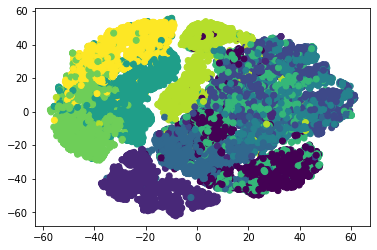

In [28]:
X_ = Xemb_train[X_pred[0][:,0]]
plt.scatter(X_[:,0], X_[:,1], c=y_train[id_train][X_pred[0][:,0]], rasterized=True)

In [29]:
accuracy_score(y_train[id_test], y_train[id_train][X_pred[0][:,0]])

0.8087333333333333